In [1]:
# Import the Library: In your Python script or notebook, import the requests library:

import requests
import nasdaqdatalink as nsdk

In [2]:
# Set Up the API Key: Assign your API key to a variable:
api_key = 'you_API_Code'

This code will fetch adjusted closing prices for Apple (AAPL), Microsoft (MSFT), and Intel (INTC) between January 1, 2011, and December 31, 2021. It then reshapes the data into a wide format where each ticker's adjusted closing price is in its own column.

In [4]:
# Set your API key
nsdk.ApiConfig.api_key = api_key

# Define the columns you want to retrieve
COLUMNS = ["date", "ticker", "adj_close"]

# Fetch the data
df = nsdk.get_table('WIKI/PRICES', 
                    ticker=['AAPL', 'MSFT', 'INTC'], 
                    qopts={'columns': COLUMNS}, 
                    date={'gte': '2011-01-01', 'lte': '2021-12-31'}, 
                    paginate=True)

print(f"Downloaded {len(df)} rows of data.")

# Set the date as index
df = df.set_index("date")

# Use the pivot function to reshape the data
df_wide = df.pivot(columns="ticker")


Downloaded 5455 rows of data.


In [5]:
df.head()

,ticker,adj_close
date,,
2018-03-27,MSFT,89.47
2018-03-26,MSFT,93.78
2018-03-23,MSFT,87.18
2018-03-22,MSFT,89.79
2018-03-21,MSFT,92.48


In [6]:
df_wide.head()

adj_close                      
ticker           AAPL       INTC       MSFT
date                                       
2011-01-03  42.354338  16.488706  23.211568
2011-01-04  42.575382  16.725954  23.300747
2011-01-05  42.923655  16.559880  23.228159
2011-01-06  42.888956  16.425440  23.908412
2011-01-07  43.196105  16.338449  23.725905

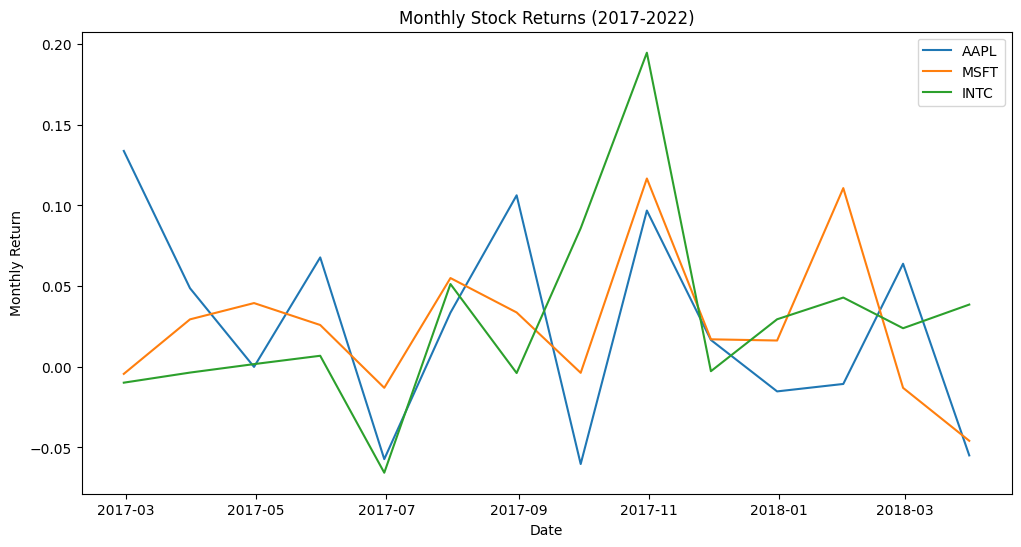

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the tickers and the date range
tickers = ['AAPL', 'MSFT', 'INTC']
start_date = '2017-01-01'
end_date = '2022-01-01'

# Fetch the data
df = pd.DataFrame()
for ticker in tickers:
    data = nsdk.get(f'WIKI/{ticker}', start_date=start_date, end_date=end_date, column_index=11)
    df[ticker] = data['Adj. Close']

# Calculate monthly returns
monthly_returns = df.resample('M').ffill().pct_change()

# Plot the monthly returns
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(monthly_returns.index, monthly_returns[ticker], label=ticker)
plt.title('Monthly Stock Returns (2017-2022)')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.show()


In [20]:
df.tail()

,AAPL,MSFT,INTC
Date,,,
2018-03-21,171.270,92.48,51.56
2018-03-22,168.845,89.79,50.83
2018-03-23,164.940,87.18,49.36
2018-03-26,172.770,93.78,52.48
2018-03-27,168.340,89.47,51.19


# The data is cut after 2018-03-27 

The issue you're encountering with the data being cut after March 27, 2018, is likely due to the source of your data. In your code, you're using nsdk.get(f'WIKI/{ticker}', ...), which suggests you are fetching data from the Quandl WIKI database. The WIKI stock price database primarily relied on data from self-reported financial statements and was known for its comprehensive historical coverage of stock prices.

However, the WIKI database stopped updating its data for most stocks as of March 27, 2018. This means that for dates beyond this, the WIKI database does not have any new data, which is why your dataset is cut off after this date.

To resolve this issue, you will need to switch to a different data source for your stock price data. There are several alternatives available. 

Nasdaq Data Link offers various databases that you can use as alternatives to the WIKI database for stock price data. Some of these include:

* Sharadar Equity Prices (SSEP): This database offers comprehensive U.S. stock price data, including daily historical stock prices for US publicly traded companies.
* Core US Fundamentals Data (CORE): This database provides fundamental data which might include some pricing information.
* EOD Historical Data (EOD): Offers end-of-day stock prices for various exchanges worldwide.
* Global Financial Data (GFD): Provides long-term historical data on stocks and other financial instruments.
* ICE Data Services (ICE): Known for providing a wide range of financial market data, including stock prices.

In [25]:
data = nsdk.get("FRED/GDP", start_date="2018-12-31", end_date="2022-12-31")
data

,Value
Date,
2019-01-01,21001.591
2019-04-01,21289.268
2019-07-01,21505.012
2019-10-01,21694.458
2020-01-01,21481.367
2020-04-01,19477.444
2020-07-01,21138.574
2020-10-01,21477.597
2021-01-01,22038.226


In [31]:
# This request will return the second column from the Treasury Yield Curve Rates time-series (USTREASURY/YIELD) which is part of the US Treasury dataset. This request will also return the first column from Gross Domestic Product time-series (FRED/GDP) which is part of the FRED dataset. 
# See this link https://docs.data.nasdaq.com/docs/python-time-series for further details
data = nsdk.get(["USTREASURY/YIELD", "FRED/GDP"])
data

,USTREASURY/YIELD - 1 MO,USTREASURY/YIELD - 2 MO,USTREASURY/YIELD - 3 MO,USTREASURY/YIELD - 6 MO,USTREASURY/YIELD - 1 YR,USTREASURY/YIELD - 2 YR,USTREASURY/YIELD - 3 YR,USTREASURY/YIELD - 5 YR,USTREASURY/YIELD - 7 YR,USTREASURY/YIELD - 10 YR,USTREASURY/YIELD - 20 YR,USTREASURY/YIELD - 30 YR,FRED/GDP - Value
Date,,,,,,,,,,,,,
1947-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.164
1947-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.968
1947-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.585
1947-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.745
1948-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.742
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-20,5.53,5.55,5.54,5.43,5.25,4.89,4.62,4.44,4.46,4.42,4.74,4.57,NaN
2023-11-21,5.52,5.54,5.53,5.42,5.24,4.86,4.60,4.41,4.44,4.41,4.75,4.57,NaN
2023-11-22,5.54,5.55,5.54,5.42,5.26,4.89,4.62,4.44,4.46,4.42,4.73,4.55,NaN


if you want to list all datasets within a database (e.g. USTREASURY), you might use something like nsdk.

In [56]:
# Fetching and listing datasets available from USTREASURY
# List datasets in the USTREASURY database
Database = 'USTREASURY'
data_sets=nsdk.Database(Database).datasets()
for dataset in data_sets:
    print(dataset.code, dataset.name)


USTREASURY/REALLONGTERM Treasury Real Long-Term Rates
USTREASURY/REALYIELD Treasury Real Yield Curve Rates
USTREASURY/BILLRATES Treasury Bill Rates
USTREASURY/YIELD Treasury Yield Curve Rates
USTREASURY/LONGTERMRATES Treasury Long Term Rates
USTREASURY/HQMYC High Quality Market Corporate Bond Yield Curve Spot Rates
USTREASURY/MATDIS Maturity Distribution and Average Length of Marketable Interest-Bearing Public Debt
USTREASURY/AVMAT Average Maturity of Total Outstanding Treasury Marketable Securities
USTREASURY/TNMBOR Treasury Net Nonmarketable Borrowing
USTREASURY/TMBOR Treasury Net Marketable Borrowing
USTREASURY/MKTDM Marketable Debt Maturing in Next 12 to 36 Months
USTREASURY/BRDNM Breakdown of Marketable Issuance


You can find more about datasets [here](https://data.nasdaq.com/data/FRED-federal-reserve-economic-data/documentation)

In [58]:
Database = 'USTREASURY'
data_sets=nsdk.Database(Database).datasets()
list=[i.code for i in data_sets]
list[0:3]

['USTREASURY/REALLONGTERM', 'USTREASURY/REALYIELD', 'USTREASURY/BILLRATES']

In [60]:
Database = 'FRED'
data_sets=nsdk.Database(Database).datasets()
for dataset in data_sets:
    print(dataset.code, dataset.name)


FRED/NROUST Natural Rate of Unemployment (Short-Term)
FRED/GDPPOT Real Potential Gross Domestic Product
FRED/NGDPPOT Nominal Potential Gross Domestic Product
FRED/NROU Natural Rate of Unemployment (Long-Term)
FRED/UNRATEMD FOMC Summary of Economic Projections for the Civilian Unemployment Rate, Median
FRED/GDPC1MD FOMC Summary of Economic Projections for the Growth Rate of Real Gross Domestic Product, Median
FRED/PCECTPIMD FOMC Summary of Economic Projections for the Personal Consumption Expenditures Inflation Rate, Median
FRED/JCXFEMD FOMC Summary of Economic Projections for the Personal Consumption Expenditures less Food and Energy Inflation Rate, Median
FRED/FEDTARRL FOMC Summary of Economic Projections for the Fed Funds Rate, Range, Low
FRED/FEDTARRM FOMC Summary of Economic Projections for the Fed Funds Rate, Range, Midpoint
FRED/FEDTARRH FOMC Summary of Economic Projections for the Fed Funds Rate, Range, High
FRED/FEDTARCTL FOMC Summary of Economic Projections for the Fed Funds R

In [47]:
data = nsdk.get("USTREASURY/HQMYC", start_date="2018-12-31", end_date="2022-12-31")
data.head()

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,...,95.5,96.0,96.5,97.0,97.5,98.0,98.5,99.0,99.5,100.0
Month,,,,,,,,,,,,,,,,,,,,,
2019-01-31,2.84,2.97,3.08,3.16,3.21,3.25,3.28,3.32,3.37,3.42,...,4.64,4.64,4.64,4.64,4.64,4.64,4.64,4.64,4.64,4.64
2019-02-28,2.72,2.84,2.94,3.00,3.04,3.06,3.07,3.09,3.13,3.18,...,4.41,4.41,4.41,4.41,4.41,4.41,4.41,4.41,4.41,4.41
2019-03-31,2.67,2.74,2.80,2.84,2.86,2.88,2.89,2.92,2.96,3.02,...,4.47,4.47,4.47,4.48,4.48,4.48,4.48,4.48,4.48,4.48
2019-04-30,2.65,2.70,2.74,2.77,2.79,2.80,2.82,2.84,2.89,2.94,...,4.40,4.40,4.40,4.40,4.40,4.40,4.40,4.40,4.40,4.40
2019-05-31,2.60,2.63,2.66,2.68,2.70,2.72,2.74,2.78,2.82,2.87,...,4.46,4.46,4.46,4.46,4.46,4.46,4.46,4.46,4.46,4.46


In [48]:
data = nsdk.get("USTREASURY/HQMYC.2", start_date="2018-12-31", end_date="2022-12-31")
data.head()

,1.0
Month,
2019-01-31,2.97
2019-02-28,2.84
2019-03-31,2.74
2019-04-30,2.70
2019-05-31,2.63


To search for databases that contain information on a specific stock, such as Moderna, using the Nasdaq Data Link (formerly Quandl) API, you would typically perform a keyword search across their datasets. However, Nasdaq Data Link organizes data into databases, each containing multiple datasets, and a direct keyword search across all databases might not always yield straightforward results, especially for specific stock tickers.

see: https://data.nasdaq.com/databases/SEP#usage

Sample Data
Free sample data is provided to all Nasdaq Data Link users, for the following stock tickers between 2018-09-01 and 2018-12-31.

In [83]:
data = nsdk.get_table('SHARADAR/SEP',date='2018-12-31,2018-12-28,2018-09-27', ticker='XOM,WMT')
data

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated
None,,,,,,,,,,
0,XOM,2018-12-31,68.320,69.145,67.660,68.19,15807007.0,52.776,68.19,2023-11-14
1,XOM,2018-12-28,69.180,69.580,67.820,68.17,19706697.0,52.761,68.17,2023-11-14
2,XOM,2018-09-27,86.085,86.375,85.590,85.77,7658502.0,65.716,85.77,2023-11-14
3,WMT,2018-12-31,92.670,93.390,92.250,93.15,7006026.0,86.033,93.15,2023-08-11
4,WMT,2018-12-28,92.070,93.470,91.645,92.13,9873873.0,85.091,92.13,2023-08-11
5,WMT,2018-09-27,94.190,94.960,93.820,94.13,5363436.0,86.463,94.13,2023-08-11


In [82]:
data = nsdk.get_table('SHARADAR/SEP',date='2018-12-31,2018-12-28,2018-12-27', ticker='XOM,WMT')
data


,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated
None,,,,,,,,,,
0,XOM,2018-12-31,68.32,69.145,67.660,68.19,15807007.0,52.776,68.19,2023-11-14
1,XOM,2018-12-28,69.18,69.580,67.820,68.17,19706697.0,52.761,68.17,2023-11-14
2,XOM,2018-12-27,67.74,68.940,66.080,68.94,22077044.0,53.356,68.94,2023-11-14
3,WMT,2018-12-31,92.67,93.390,92.250,93.15,7006026.0,86.033,93.15,2023-08-11
4,WMT,2018-12-28,92.07,93.470,91.645,92.13,9873873.0,85.091,92.13,2023-08-11
5,WMT,2018-12-27,89.75,91.610,88.440,91.59,9881506.0,84.592,91.59,2023-08-11


In [74]:
# Define the tickers and the date range
tickers = ['AAPL', 'MSFT', 'INTC']
start_date = '2017-01-01'
end_date = '2022-01-01'

# Fetch the data
df = pd.DataFrame()
for ticker in tickers:
    data = nsdk.get_table('SHARADAR/SEP',date='2018-12-31,2018-12-28,2022-12-27', ticker=ticker)
    df[ticker] = data['closeadj']

In [75]:
df

,AAPL,MSFT,INTC
None,,,
0,37.849,96.432,40.942
1,37.487,95.311,40.785


# Alternative Analysis

For a performance analysis of pharmaceutical companies that have been involved in the development of COVID-19 vaccines, we can consider companies like Pfizer (PFE), Moderna (MRNA), and Johnson & Johnson (JNJ). 

The below is a very basic Python script that uses the nasdaqdatalink package to analyze their stock performance. 



In [8]:
import nasdaqdatalink as nsdk
import pandas as pd

# Define the tickers and the date range
tickers = ['AAPL', 'MSFT', 'INTC']
start_date = '2020-01-01'
end_date = '2022-01-01'

# Function to calculate annualized return
def calculate_annualized_return(data):
    if len(data) > 0:
        total_return = data.iloc[-1] / data.iloc[0] - 1
        num_years = (data.index[-1] - data.index[0]).days / 365.25
        annualized_return = (1 + total_return) ** (1 / num_years) - 1
        return annualized_return
    else:
        return None

# Fetch and process data for each ticker
returns = {}
for ticker in tickers:
    try:
        # Fetch adjusted closing prices
        # data = nsdk.get(f'WIKI/{ticker}', start_date=start_date, end_date=end_date)
        data = nsdk.get(f'WIKI/{ticker}', start_date=start_date, end_date=end_date, column_index=11)
        # Calculate annualized return
        annualized_return = calculate_annualized_return(data['Adj. Close'])
        if annualized_return is not None:
            returns[ticker] = annualized_return
        else:
            print(f"No data available for {ticker}")
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert the returns dictionary to a DataFrame
df_returns = pd.DataFrame.from_dict(returns, orient='index', columns=['Annualized Return'])

# Display the results
print(df_returns)


No data available for AAPL
No data available for MSFT
No data available for INTC
Empty DataFrame
Columns: [Annualized Return]
Index: []


In [19]:
df

,AAPL,MSFT,INTC
Date,,,
2017-01-03,114.715378,61.219142,35.391923
2017-01-04,114.586983,60.945231,35.208194
2017-01-05,115.169696,60.945231,35.150174
2017-01-06,116.453639,61.473488,35.275883
2017-01-09,117.520300,61.277837,35.401592
...,...,...,...
2018-03-21,171.270000,92.480000,51.560000
2018-03-22,168.845000,89.790000,50.830000
2018-03-23,164.940000,87.180000,49.360000


In [15]:

# Define the ticker for Moderna and the date range
ticker = 'MRNA'
start_date = '2020-01-01'  # Adjust the start date as needed
end_date = '2022-01-01'    # Adjust the end date as needed

try:
    # Fetch the stock data for Moderna
    # Note: The exact dataset code depends on Nasdaq Data Link's data structure
    data = nsdk.get(f'HKEX/{ticker}', start_date=start_date, end_date=end_date)
    
    # Display the first few rows of the data
    print(data.head())

except Exception as e:
    print(f"Error fetching data for {ticker}: {e}")


Error fetching data for MRNA: (Status 404) (Nasdaq Data Link Error QECx02) You have submitted an incorrect Dataset code. Please check your Dataset codes and try again.
